# `classification.XGBoostClassifier`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.0b0


In [16]:
from slickml.classification import XGBoostClassifier

help(XGBoostClassifier)

Help on class XGBoostClassifier in module slickml.classification._xgboost:

class XGBoostClassifier(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin)
 |  XGBoostClassifier(num_boost_round: Optional[int] = 200, metrics: Optional[str] = 'auc', sparse_matrix: Optional[bool] = False, scale_mean: Optional[bool] = False, scale_std: Optional[bool] = False, importance_type: Optional[str] = 'total_gain', params: Optional[dict] = None) -> None
 |  
 |  XGBoost Classifier.
 |  
 |  This is wrapper using XGBoost classifier to train a XGBoost _[1] model with using the optimum
 |  number of boosting rounds from the inputs. This is also the base class for ``XGBoostCVClassifier``.
 |  
 |  Parameters
 |  ----------
 |  num_boost_round : int, optional
 |      Number of boosting rounds to fit a model, by default 200
 |  
 |  metrics : str, optional
 |      Metrics to be tracked at fitting time with possible values of "auc", "aucpr", "error",
 |      "logloss". Note this is different than `eval_m

### Example 1: `XGBoostClassifer` mode for `breast-cancer` data set

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
)

In [5]:
# custom params
params = {
    "eval_metric": "auc",
    "learning_rate": 0.05,
    "max_depth": 2,
    "min_child_weight": 1,
    "gamma": 0.0,
    "silent": 0,
}
clf = XGBoostClassifier(
    num_boost_round=333,
    metrics=("logloss"),
    params=params,
)
clf.fit(X_train, y_train)

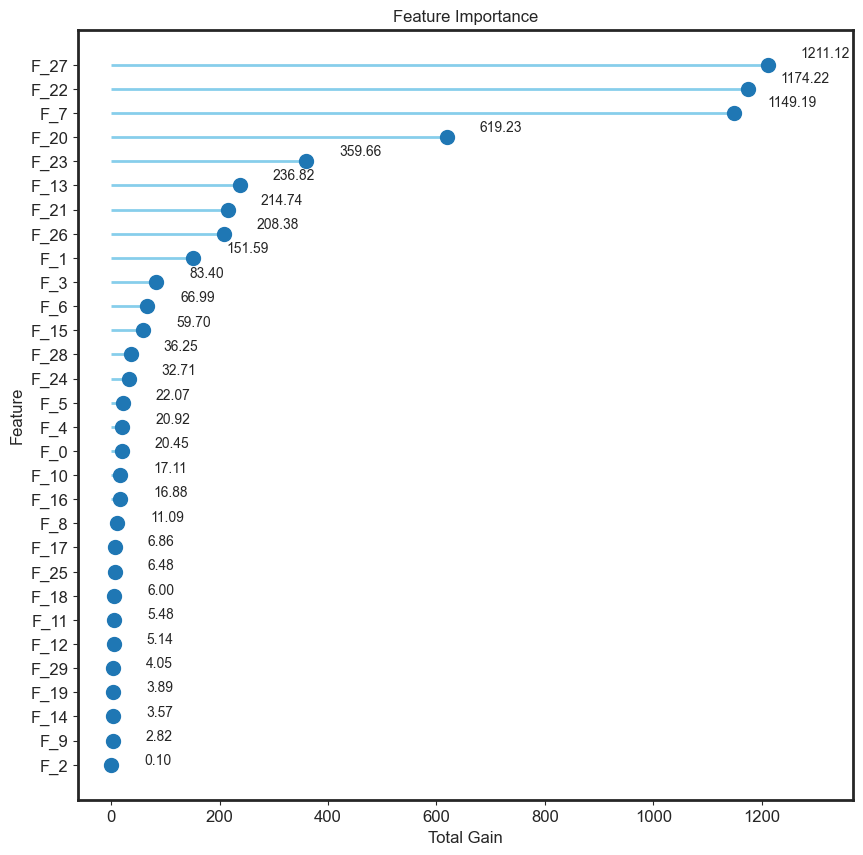

In [6]:
clf.plot_feature_importance(figsize=(10, 10))

In [7]:
# predic proba (or clf.y_pred_proba_)
# please note that y_test is optional
y_pred_proba = clf.predict_proba(X_test, y_test=None)
y_pred_proba[:10]

array([0.99144405, 0.00132439, 0.00108025, 0.9947541 , 0.00852281,
       0.99841857, 0.3322815 , 0.31123254, 0.99989486, 0.00269651],
      dtype=float32)

In [8]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

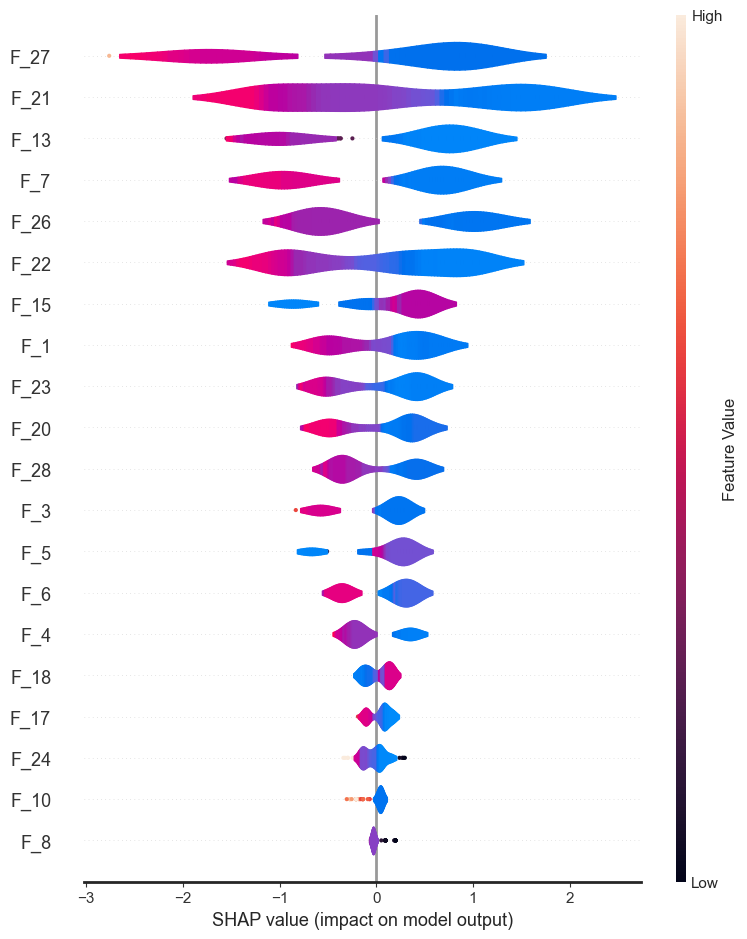

In [9]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

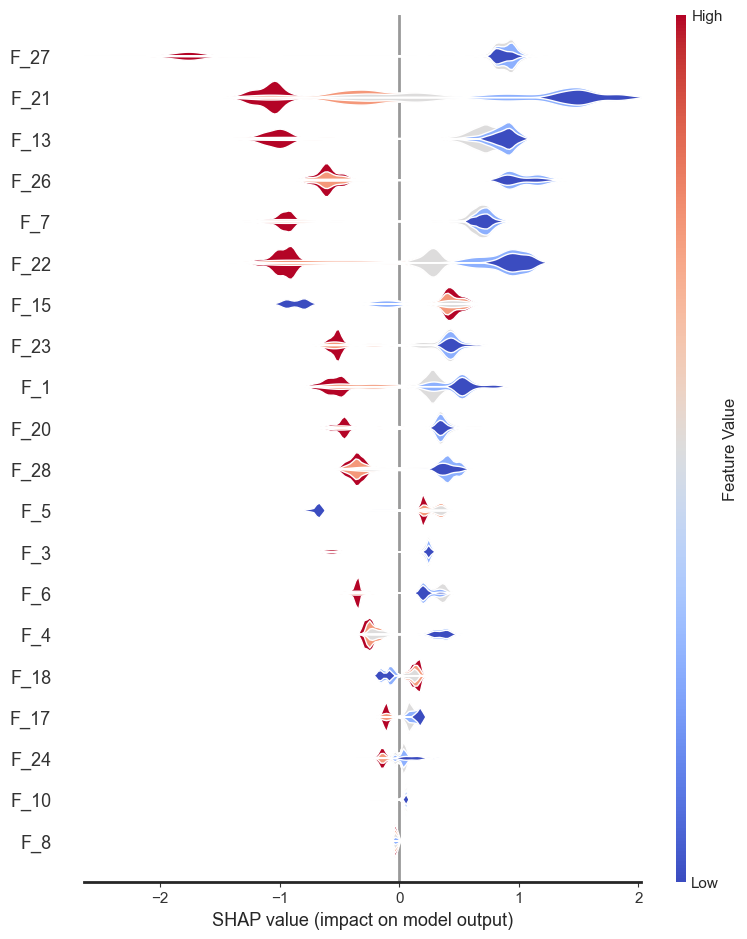

In [10]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(
    plot_type="layered_violin",
    validation=False,
    layered_violin_max_num_bins=5,
)

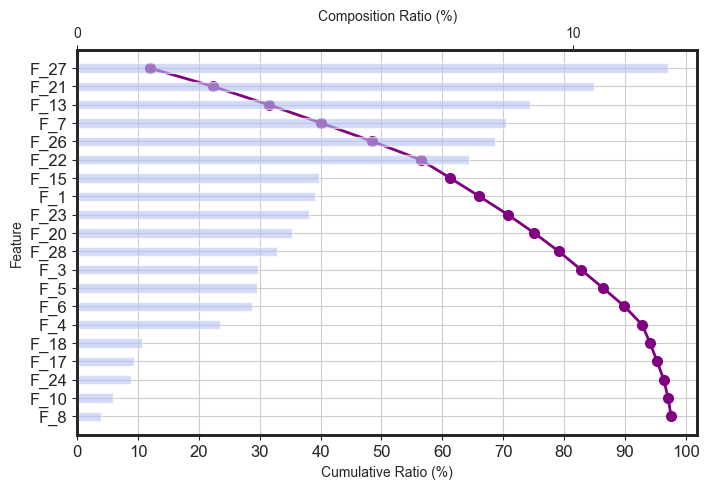

In [11]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [12]:
clf.shap_values_test_[:10]

array([[ 4.04745936e-02,  3.63705099e-01, -2.24059820e-03,
         2.11711317e-01,  3.79390717e-01, -6.93145514e-01,
         1.82430819e-01,  7.50306845e-01, -3.44419405e-02,
        -4.37239148e-02,  5.30351847e-02,  4.60540457e-03,
         1.53054791e-02,  6.82485998e-01, -3.57823372e-02,
        -9.64074969e-01, -4.74178717e-02,  1.92900315e-01,
        -1.71810031e-01,  3.90236937e-02,  1.63387477e-01,
        -2.68074393e-01,  3.18703353e-01,  1.50858343e-01,
         8.32485557e-02, -1.11301556e-01,  1.18928516e+00,
         9.68621254e-01,  5.30832887e-01, -1.22503573e-02],
       [-9.62665230e-02, -5.11018217e-01,  6.50843792e-03,
        -5.51913381e-01, -2.63453126e-01,  2.47001514e-01,
        -3.49166453e-01, -8.83108497e-01, -3.81861888e-02,
        -2.05491036e-02,  2.31304374e-02, -2.64261197e-03,
         8.68498720e-03, -1.09396005e+00, -1.25660505e-02,
         4.64267015e-01,  1.42113464e-02,  8.10710266e-02,
        -7.02271014e-02,  3.66862267e-02, -6.71409845e-

In [13]:
clf.shap_values_train_[:10]

array([[ 4.04745936e-02,  2.87676185e-01, -2.24059820e-03,
         2.42893666e-01,  3.00681919e-01, -6.68475926e-01,
         1.91288814e-01,  6.68994009e-01, -1.64294783e-02,
         5.52699305e-02,  5.30351847e-02, -3.67041640e-02,
         1.53054791e-02,  6.68628752e-01, -3.57823372e-02,
        -7.82519281e-01, -4.74178717e-02,  1.85276985e-01,
         1.64474562e-01,  1.88577455e-02,  3.17984134e-01,
         1.35541403e+00,  9.78153229e-01,  3.91047478e-01,
         1.45139471e-01, -1.11301556e-01,  8.48526478e-01,
         7.95841932e-01,  3.12922210e-01, -1.22503573e-02],
       [ 3.33083123e-02,  1.94765970e-01, -7.38515193e-03,
         2.70783633e-01,  4.40907866e-01,  3.35128933e-01,
         3.44813615e-01, -5.02669930e-01, -1.64294783e-02,
         4.11506072e-02,  2.78295279e-02,  4.60540457e-03,
         1.25898616e-02, -3.85809660e-01,  2.36427914e-02,
         4.59370136e-01,  3.63702998e-02, -1.31466299e-01,
         1.64525464e-01,  2.20411923e-02,  3.67652655e-

In [14]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F_27,1211.124390
1,F_22,1174.224854
2,F_7,1149.185669
3,F_20,619.232300
4,F_23,359.659210
5,F_13,236.821030
6,F_21,214.740982
7,F_26,208.379456
8,F_1,151.585114
9,F_3,83.401741


In [15]:
clf.model_